In [ ]:
import pandas as pd

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bqKu0kWwszzcRNxn6UO_yXjquPspaqL4/view?usp=sharing
df=pd.read_csv('Banglore_traffic_Dataset.csv')

Downloading...
From: https://drive.google.com/uc?id=1bqKu0kWwszzcRNxn6UO_yXjquPspaqL4
To: /content/Banglore_traffic_Dataset.csv
100% 1.54M/1.54M [00:00<00:00, 107MB/s]


In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


#Preprocessing

In [ ]:
df['Congestion Level'].value_counts()

,count
Congestion Level,
100.000000,3884
94.953360,1
41.879021,1
55.182334,1
99.994420,1
...,...
75.862103,1
58.551107,1
31.615053,1


In [ ]:
#value counts of the areas and their road/intersection
df[['Area Name','Road/Intersection Name']].value_counts()

Area Name        Road/Intersection Name
Indiranagar      CMH Road                  860
                 100 Feet Road             860
M.G. Road        Anil Kumble Circle        759
                 Trinity Circle            742
Koramangala      Sony World Junction       684
                 Sarjapur Road             680
Jayanagar        South End Circle          593
                 Jayanagar 4th Block       580
Whitefield       Marathahalli Bridge       492
Hebbal           Ballari Road              476
                 Hebbal Flyover            474
Whitefield       ITPL Main Road            450
Yeshwanthpur     Yeshwanthpur Circle       373
                 Tumkur Road               361
Electronic City  Hosur Road                277
                 Silk Board Junction       275
Name: count, dtype: int64

In [ ]:
#Checking the null values
df.isnull().sum()

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [ ]:
cat=df.columns

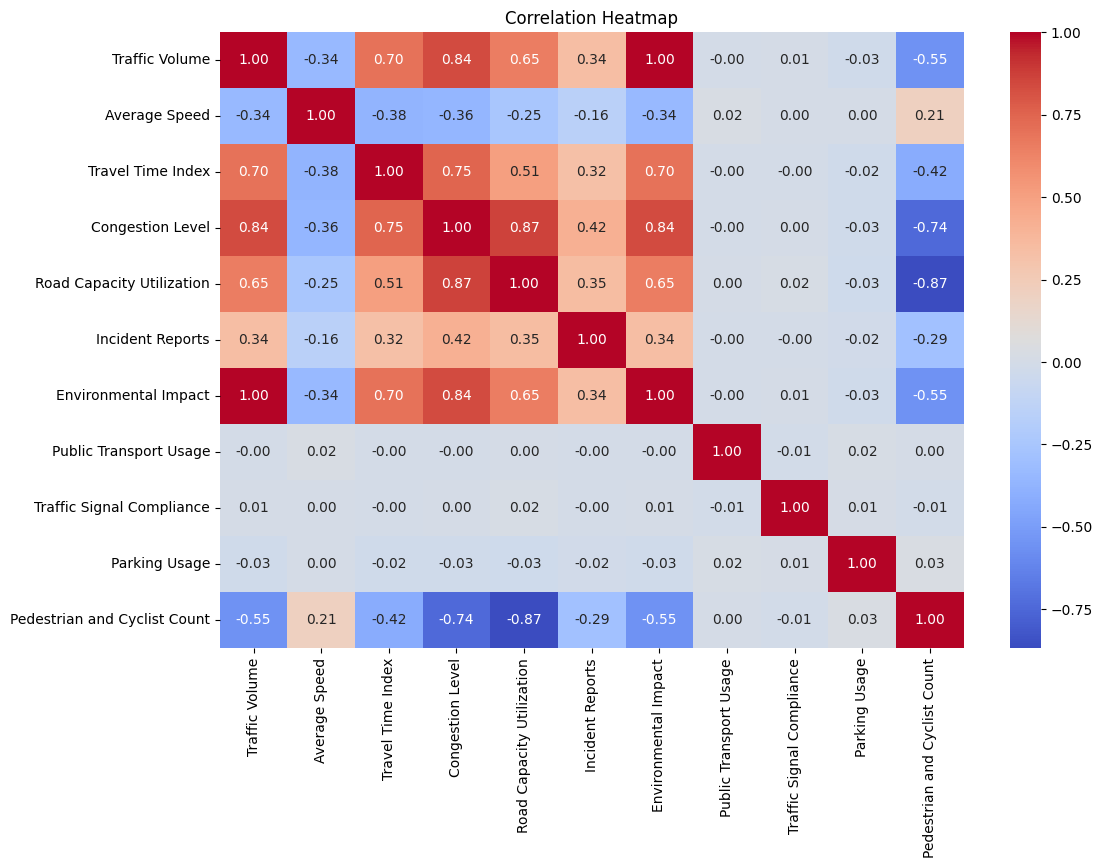

In [ ]:
#plotting a heatmap to check the correlation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df['Roadwork and Construction Activity'].value_counts()

,count
Roadwork and Construction Activity,
No,8054
Yes,882


In [ ]:
df.select_dtypes('object')

,Date,Area Name,Road/Intersection Name,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,Clear,No
1,2022-01-01,Indiranagar,CMH Road,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,Clear,No
...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,Fog,No
8932,2024-08-09,M.G. Road,Trinity Circle,Clear,No
8933,2024-08-09,M.G. Road,Anil Kumble Circle,Clear,No
8934,2024-08-09,Jayanagar,South End Circle,Clear,No


In [ ]:
#Replace the string values 'No' with the integer 0 and 'Yes' with the integer 1.
df['Roadwork and Construction Activity'].replace({'No':0, 'Yes':1},inplace=True)

/tmp/ipython-input-3362957366.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Roadwork and Construction Activity'].replace({'No':0, 'Yes':1},inplace=True)
/tmp/ipython-input-3362957366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Roadwork and Construction Activity'].replace({'No':

In [ ]:
df['Weather Conditions'].value_counts()

,count
Weather Conditions,
Clear,5426
Overcast,1296
Fog,959
Rain,827
Windy,428


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [ ]:
# Ensure all entries in the 'Weather Conditions' column are treated as strings to prevent data type errors.

df['Weather Conditions'] = df['Weather Conditions'].astype(str)

In [ ]:
# Import encoder
from sklearn.preprocessing import OneHotEncoder

# Create encoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop='first')

# Encode 'Weather Conditions' column
encoded = encoder.fit_transform(df[['Weather Conditions']])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Weather Conditions']))

# Combine encoded columns with original DataFrame
df1 = pd.concat([df.drop('Weather Conditions', axis=1).reset_index(drop=True),
                 encoded_df.reset_index(drop=True)], axis=1)

# Show final DataFrame
df1


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity,Weather Conditions_Fog,Weather Conditions_Overcast,Weather Conditions_Rain,Weather Conditions_Windy
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,0,0.0,0.0,0.0,0.0
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,0,0.0,0.0,0.0,0.0
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,0,0.0,0.0,0.0,0.0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,0,0.0,0.0,0.0,0.0
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,0,1.0,0.0,0.0,0.0
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,0,0.0,0.0,0.0,0.0
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,0,0.0,0.0,0.0,0.0
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,0,0.0,0.0,0.0,0.0


In [ ]:
# Create a new 'Location' column by combining the area and road name for a more specific identifier.

df1['Location'] = df1['Area Name'] + " - " + df1['Road/Intersection Name']

In [ ]:
df1.drop(columns=['Area Name','Road/Intersection Name'], inplace=True)

In [ ]:
df1['Location'].value_counts()

,count
Location,
Indiranagar - 100 Feet Road,860
Indiranagar - CMH Road,860
M.G. Road - Anil Kumble Circle,759
M.G. Road - Trinity Circle,742
Koramangala - Sony World Junction,684
Koramangala - Sarjapur Road,680
Jayanagar - South End Circle,593
Jayanagar - Jayanagar 4th Block,580
Whitefield - Marathahalli Bridge,492


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1['day_of_week'] = df1['Date'].dt.dayofweek

In [ ]:
df1['day_of_week'].value_counts()

,count
day_of_week,
1,1309
0,1296
5,1290
6,1272
2,1266
4,1253
3,1250


In [ ]:
df1.select_dtypes('object')

,Location
0,Indiranagar - 100 Feet Road
1,Indiranagar - CMH Road
2,Whitefield - Marathahalli Bridge
3,Koramangala - Sony World Junction
4,Koramangala - Sarjapur Road
...,...
8931,Electronic City - Hosur Road
8932,M.G. Road - Trinity Circle
8933,M.G. Road - Anil Kumble Circle
8934,Jayanagar - South End Circle


In [ ]:
df1 = pd.get_dummies(df1, columns=['Location'], drop_first=True) # One-hot encode 'Location' column, drop first to avoid dummy trap

In [ ]:
df1

,Date,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,...,Location_Jayanagar - Jayanagar 4th Block,Location_Jayanagar - South End Circle,Location_Koramangala - Sarjapur Road,Location_Koramangala - Sony World Junction,Location_M.G. Road - Anil Kumble Circle,Location_M.G. Road - Trinity Circle,Location_Whitefield - ITPL Main Road,Location_Whitefield - Marathahalli Bridge,Location_Yeshwanthpur - Tumkur Road,Location_Yeshwanthpur - Yeshwanthpur Circle
0,2022-01-01,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,...,False,False,False,False,False,False,False,False,False,False
1,2022-01-01,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,...,False,False,False,False,False,False,False,False,False,False
2,2022-01-01,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,...,False,False,False,False,False,False,False,True,False,False
3,2022-01-01,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,...,False,False,False,True,False,False,False,False,False,False
4,2022-01-01,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,...,False,False,False,False,False,False,False,False,False,False
8932,2024-08-09,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,...,False,False,False,False,False,True,False,False,False,False
8933,2024-08-09,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,...,False,False,False,False,True,False,False,False,False,False
8934,2024-08-09,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
df1.columns

Index(['Date', 'Traffic Volume', 'Average Speed', 'Travel Time Index',
       'Congestion Level', 'Road Capacity Utilization', 'Incident Reports',
       'Environmental Impact', 'Public Transport Usage',
       'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Roadwork and Construction Activity',
       'Weather Conditions_Fog', 'Weather Conditions_Overcast',
       'Weather Conditions_Rain', 'Weather Conditions_Windy', 'day_of_week',
       'Location_Electronic City - Silk Board Junction',
       'Location_Hebbal - Ballari Road', 'Location_Hebbal - Hebbal Flyover',
       'Location_Indiranagar - 100 Feet Road',
       'Location_Indiranagar - CMH Road',
       'Location_Jayanagar - Jayanagar 4th Block',
       'Location_Jayanagar - South End Circle',
       'Location_Koramangala - Sarjapur Road',
       'Location_Koramangala - Sony World Junction',
       'Location_M.G. Road - Anil Kumble Circle',
       'Location_M.G. Road - Trinity Circle',
       

In [ ]:
for col in df1.columns[18:]:
  df1[col].replace({True:1, False:0}, inplace=True)

/tmp/ipython-input-3793435932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({True:1, False:0}, inplace=True)
/tmp/ipython-input-3793435932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({True:1, False:0}, inplace=True)


In [ ]:
df1.drop(columns=['Date'], inplace=True)

In [ ]:
df1.columns

Index(['Traffic Volume', 'Average Speed', 'Travel Time Index',
       'Congestion Level', 'Road Capacity Utilization', 'Incident Reports',
       'Environmental Impact', 'Public Transport Usage',
       'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Roadwork and Construction Activity',
       'Weather Conditions_Fog', 'Weather Conditions_Overcast',
       'Weather Conditions_Rain', 'Weather Conditions_Windy', 'day_of_week',
       'Location_Electronic City - Silk Board Junction',
       'Location_Hebbal - Ballari Road', 'Location_Hebbal - Hebbal Flyover',
       'Location_Indiranagar - 100 Feet Road',
       'Location_Indiranagar - CMH Road',
       'Location_Jayanagar - Jayanagar 4th Block',
       'Location_Jayanagar - South End Circle',
       'Location_Koramangala - Sarjapur Road',
       'Location_Koramangala - Sony World Junction',
       'Location_M.G. Road - Anil Kumble Circle',
       'Location_M.G. Road - Trinity Circle',
       'Locatio

In [ ]:
X=df1.drop('Congestion Level', axis=1)
Y=df1['Congestion Level']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Columns to apply Min-Max scaling
cols_to_scale = [
    'Traffic Volume', 'Average Speed', 'Road Capacity Utilization',
    'Incident Reports', 'Environmental Impact', 'Public Transport Usage',
    'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count'
]

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Scale the training data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
# Scale the test data using the same scaler
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [ ]:
X_train

,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,...,Location_Jayanagar - Jayanagar 4th Block,Location_Jayanagar - South End Circle,Location_Koramangala - Sarjapur Road,Location_Koramangala - Sony World Junction,Location_M.G. Road - Anil Kumble Circle,Location_M.G. Road - Trinity Circle,Location_Whitefield - ITPL Main Road,Location_Whitefield - Marathahalli Bridge,Location_Yeshwanthpur - Tumkur Road,Location_Yeshwanthpur - Yeshwanthpur Circle
468,0.340398,0.219021,1.500000,1.000000,0.1,0.340398,0.058436,0.305394,0.157331,0.129944,...,0,0,0,0,1,0,0,0,0,0
1545,0.160207,0.142873,1.375913,0.697795,0.0,0.160207,0.000000,0.899467,0.081338,0.344633,...,0,0,0,0,0,0,0,0,0,0
7773,0.539834,0.414179,1.500000,1.000000,0.2,0.539834,0.501352,0.602549,0.730991,0.203390,...,0,0,0,0,1,0,0,0,0,0
3024,0.708610,0.387274,1.500000,1.000000,0.4,0.708610,0.098094,0.852242,0.533393,0.209040,...,0,0,0,0,0,0,0,0,0,0
8586,0.443648,0.644532,1.500000,1.000000,0.2,0.443648,0.468240,0.350656,0.775771,0.333333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.251069,0.578742,1.294413,1.000000,0.0,0.251069,0.234459,0.377225,0.696925,0.192090,...,1,0,0,0,0,0,0,0,0,0
5191,0.303410,0.387084,1.161271,1.000000,0.1,0.303410,0.648068,0.994241,0.060234,0.152542,...,0,0,0,0,0,1,0,0,0,0
5390,0.527004,0.234547,1.500000,1.000000,0.1,0.527004,0.501386,0.490527,0.546119,0.000000,...,0,0,0,0,0,0,0,0,0,0
860,0.213580,0.545086,1.233040,0.914215,0.0,0.213580,0.495742,0.870454,0.775917,0.186441,...,0,0,0,0,0,0,1,0,0,0


#Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [ ]:
print("MSE of the model:", mse)
print("R2 score of the model:", r2)

MSE of the model: 44.45299890038633
R2 score of the model: 0.9178269165159831


In [ ]:
n=len(y_test)
p=X_test.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1))

In [ ]:
print("Adjusted R2 score", adj_r2)

Adjusted R2 score 0.9163762527414931


#Calculating VIF and reviewing OLS of the model

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# New DataFrame containing only the numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=np.number)


# New DataFrame for VIF calculation
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_numeric.columns

# Calculate VIF for each feature using the numeric-only values
vif_df["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                          for i in range(len(X_train_numeric.columns))]

# Sort the VIF values in descending order
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df_sorted)


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                           feature        VIF
0                                   Traffic Volume        inf
5                             Environmental Impact        inf
2                                Travel Time Index  95.861260
3                        Road Capacity Utilization  64.786180
9                     Pedestrian and Cyclist Count   7.108226
1                                    Average Speed   4.654217
20                 Location_Indiranagar - CMH Road   4.267141
19            Location_Indiranagar - 100 Feet Road   4.262473
25         Location_M.G. Road - Anil Kumble Circle   4.039332
8                                    Parking Usage   4.036571
7                        Traffic Signal Compliance   3.975687
6                           Public Transport Usage   3.971667
26             Location_M.G. Road - Trinity Circle   3.866180
24      Location_Koramangala - Sony World Junction   3.777678
23            Location_Koramangala - Sarjapur Road   3.703100
15      

In [ ]:
X_train_final = X_train_numeric.drop('Environmental Impact', axis=1)   #dropping the feature having the highest VIF value

In [ ]:
# New DataFrame containing only the numeric columns from X_train
X_train_numeric = X_train_final.select_dtypes(include=np.number)


# New DataFrame for VIF calculation
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_numeric.columns

# Calculate VIF for each feature using the numeric-only values
vif_df["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                          for i in range(len(X_train_numeric.columns))]

# Sort the VIF values in descending order
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df_sorted)

                                           feature        VIF
2                                Travel Time Index  95.861260
3                        Road Capacity Utilization  64.786180
0                                   Traffic Volume  13.872046
8                     Pedestrian and Cyclist Count   7.108226
1                                    Average Speed   4.654217
19                 Location_Indiranagar - CMH Road   4.267141
18            Location_Indiranagar - 100 Feet Road   4.262473
24         Location_M.G. Road - Anil Kumble Circle   4.039332
7                                    Parking Usage   4.036571
6                        Traffic Signal Compliance   3.975687
5                           Public Transport Usage   3.971667
25             Location_M.G. Road - Trinity Circle   3.866180
23      Location_Koramangala - Sony World Junction   3.777678
22            Location_Koramangala - Sarjapur Road   3.703100
14                                     day_of_week   3.195828
21      

In [ ]:
X_train_final = X_train_numeric.drop('Travel Time Index', axis=1) #dropping the feature having the highest VIF value

In [ ]:
# New DataFrame containing only the numeric columns from X_train
X_train_numeric = X_train_final.select_dtypes(include=np.number)


# New DataFrame for VIF calculation
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_numeric.columns

# Calculate VIF for each feature using the numeric-only values
vif_df["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                          for i in range(len(X_train_numeric.columns))]

# Sort the VIF values in descending order
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df_sorted)

                                           feature        VIF
2                        Road Capacity Utilization  37.225079
0                                   Traffic Volume  11.946793
1                                    Average Speed   4.646921
7                     Pedestrian and Cyclist Count   4.418636
17            Location_Indiranagar - 100 Feet Road   4.053904
18                 Location_Indiranagar - CMH Road   4.049628
6                                    Parking Usage   4.020750
5                        Traffic Signal Compliance   3.960991
4                           Public Transport Usage   3.950348
23         Location_M.G. Road - Anil Kumble Circle   3.825001
24             Location_M.G. Road - Trinity Circle   3.668996
22      Location_Koramangala - Sony World Junction   3.600333
21            Location_Koramangala - Sarjapur Road   3.515780
13                                     day_of_week   3.184007
20           Location_Jayanagar - South End Circle   2.917538
19      

In [ ]:
X_train_final = X_train_numeric.drop('Road Capacity Utilization', axis=1) #dropping the feature having the highest VIF value

In [ ]:
# New DataFrame containing only the numeric columns from X_train
X_train_numeric = X_train_final.select_dtypes(include=np.number)


# New DataFrame for VIF calculation
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_numeric.columns

# Calculate VIF for each feature using the numeric-only values
vif_df["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                          for i in range(len(X_train_numeric.columns))]

# Sort the VIF values in descending order
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df_sorted)

                                           feature       VIF
0                                   Traffic Volume  9.173482
1                                    Average Speed  4.342805
5                                    Parking Usage  3.908791
3                           Public Transport Usage  3.825162
4                        Traffic Signal Compliance  3.815400
6                     Pedestrian and Cyclist Count  3.539247
12                                     day_of_week  3.109447
17                 Location_Indiranagar - CMH Road  2.942816
16            Location_Indiranagar - 100 Feet Road  2.922422
21      Location_Koramangala - Sony World Junction  2.912153
22         Location_M.G. Road - Anil Kumble Circle  2.872120
20            Location_Koramangala - Sarjapur Road  2.814320
23             Location_M.G. Road - Trinity Circle  2.767940
2                                 Incident Reports  2.583791
19           Location_Jayanagar - South End Circle  2.065484
18        Location_Jayan

In [ ]:
X_train_final = X_train_numeric.drop('Traffic Volume', axis=1) #dropping the feature having the highest VIF value

In [ ]:
# New DataFrame containing only the numeric columns from X_train
X_train_numeric = X_train_final.select_dtypes(include=np.number)


# New DataFrame for VIF calculation
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_numeric.columns

# Calculate VIF for each feature using the numeric-only values
vif_df["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                          for i in range(len(X_train_numeric.columns))]

# Sort the VIF values in descending order
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df_sorted)

                                           feature       VIF
0                                    Average Speed  4.303735
4                                    Parking Usage  3.885928
2                           Public Transport Usage  3.806157
3                        Traffic Signal Compliance  3.771243
11                                     day_of_week  3.087686
5                     Pedestrian and Cyclist Count  2.987998
1                                 Incident Reports  2.461851
16                 Location_Indiranagar - CMH Road  2.178421
15            Location_Indiranagar - 100 Feet Road  2.148390
21         Location_M.G. Road - Anil Kumble Circle  2.001644
22             Location_M.G. Road - Trinity Circle  1.966162
19            Location_Koramangala - Sarjapur Road  1.862224
20      Location_Koramangala - Sony World Junction  1.852667
18           Location_Jayanagar - South End Circle  1.775479
17        Location_Jayanagar - Jayanagar 4th Block  1.745902
24       Location_Whitef

In [ ]:
#We have now got vif of all the features under 5 but the problem is in this process we have removed all the important features that contributed the most

In [ ]:
import statsmodels.api as sm

# add a constant (the intercept)
X_train_ols = sm.add_constant(X_train_final)

# Fit the OLS model
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Print the full summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     616.8
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:                -28429.
No. Observations:                7148   AIC:                         5.691e+04
Df Residuals:                    7120   BIC:                         5.711e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train_updated = X_train_final.drop('Traffic Signal Compliance', axis=1)  #dropping the feature having the highest p-value

In [ ]:
# add a constant (the intercept)
X_train_ols = sm.add_constant(X_train_updated)

# Fit the OLS model
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Print the full summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     640.7
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:                -28429.
No. Observations:                7148   AIC:                         5.691e+04
Df Residuals:                    7121   BIC:                         5.710e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train_updated = X_train_updated.drop('Roadwork and Construction Activity', axis=1) #dropping the feature having the highest p-value

In [ ]:
# add a constant (the intercept)
X_train_ols = sm.add_constant(X_train_updated)

# Fit the OLS model
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Print the full summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     666.4
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:                -28429.
No. Observations:                7148   AIC:                         5.691e+04
Df Residuals:                    7122   BIC:                         5.709e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train_updated = X_train_updated.drop('Parking Usage', axis=1) #dropping the feature having the highest p-value

In [ ]:
# add a constant (the intercept)
X_train_ols = sm.add_constant(X_train_updated)

# Fit the OLS model
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Print the full summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     694.2
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:                -28429.
No. Observations:                7148   AIC:                         5.691e+04
Df Residuals:                    7123   BIC:                         5.708e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train_updated.drop(columns=['Weather Conditions_Fog','Weather Conditions_Overcast', 'Weather Conditions_Rain','Weather Conditions_Windy'], inplace=True)   #dropping all the weather cols

In [ ]:
# add a constant (the intercept)
X_train_ols = sm.add_constant(X_train_updated)

# Fit the OLS model
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Print the full summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     833.2
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:                -28430.
No. Observations:                7148   AIC:                         5.690e+04
Df Residuals:                    7127   BIC:                         5.705e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
X_train_updated.drop(columns=['Public Transport Usage'], inplace=True)  #dropping the feature having the highest p-value

In [ ]:
# add a constant (the intercept)
X_train_ols = sm.add_constant(X_train_updated)

# Fit the OLS model
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Print the full summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     877.1
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:                -28431.
No. Observations:                7148   AIC:                         5.690e+04
Df Residuals:                    7128   BIC:                         5.704e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

#Trying out removing weather column and target encoding the Location column

In [ ]:
df2=df.copy()

In [ ]:
df2

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,0
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,0
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,0
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,0
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,0
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,0
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,0
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,0


In [ ]:
df2.drop(columns=['Weather Conditions'], inplace=True)

In [ ]:
df2['Location'] = df2['Area Name'] + " - " + df2['Road/Intersection Name']

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [ ]:
df2['day_of_week'] = df2['Date'].dt.dayofweek

In [ ]:
df2.drop(columns=['Area Name','Road/Intersection Name', 'Date'], inplace=True)

In [ ]:
X=df2.drop('Congestion Level', axis=1)
Y=df2['Congestion Level']

In [ ]:
cols_to_scale=['Traffic Volume', 'Average Speed','Road Capacity Utilization', 'Incident Reports', 'Environmental Impact', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage','Pedestrian and Cyclist Count']

In [ ]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Calculate the average target value for each category using ONLY the training data
location_map = X_train.join(y_train).groupby('Location')['Congestion Level'].mean()


# 4. Map these mean values to the 'Location' column in both sets
X_train['Location_encoded'] = X_train['Location'].map(location_map)
X_test['Location_encoded'] = X_test['Location'].map(location_map)


# 5. Handle potential new categories in the test set by filling with the overall mean
global_mean = y_train.mean()
X_test['Location_encoded'].fillna(global_mean, inplace=True)

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# 6. Drop the original text 'Location' column
X_train.drop('Location', axis=1, inplace=True)
X_test.drop('Location', axis=1, inplace=True)

/tmp/ipython-input-2247205181.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Location_encoded'].fillna(global_mean, inplace=True)


In [ ]:
model1=LinearRegression()
model1.fit(X_train, y_train)

y_pred=model1.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("MSE of the model:", mse)
print("R2 score of the model:", r2)

MSE of the model: 44.94602851717966
R2 score of the model: 0.9169155322480367


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# New DataFrame containing only the numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=np.number)


# New DataFrame for VIF calculation
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_numeric.columns

# Calculate VIF for each feature using the numeric-only values
vif_df["VIF"] = [variance_inflation_factor(X_train_numeric.values, i)
                          for i in range(len(X_train_numeric.columns))]

# Sort the VIF values in descending order
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)

print(vif_df_sorted)


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               feature        VIF
0                       Traffic Volume        inf
5                 Environmental Impact        inf
2                    Travel Time Index  96.596299
3            Road Capacity Utilization  67.371481
12                    Location_encoded  63.809642
9         Pedestrian and Cyclist Count   7.707958
1                        Average Speed   4.614268
8                        Parking Usage   4.026621
7            Traffic Signal Compliance   3.962243
6               Public Transport Usage   3.962192
11                         day_of_week   3.194582
4                     Incident Reports   2.630433
10  Roadwork and Construction Activity   1.110125


In [ ]:
#Again we will enter the same cycle of removing the major points, which is problematic

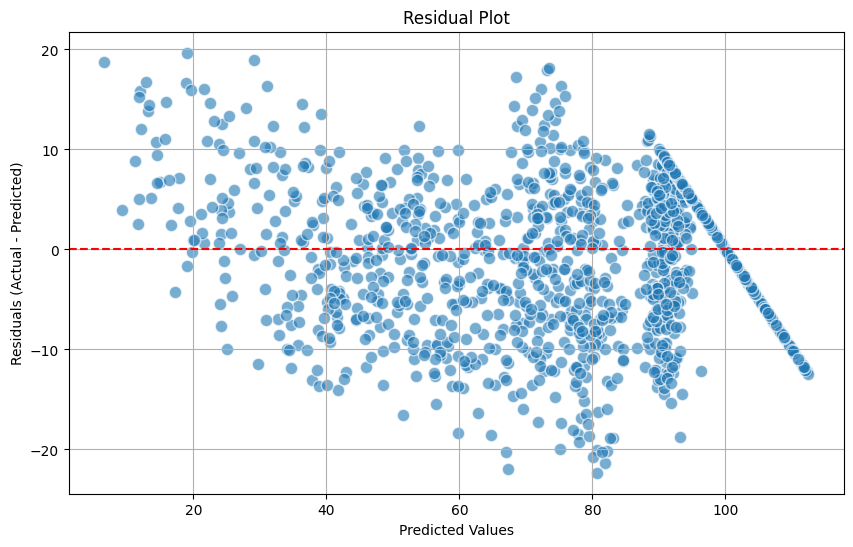

In [ ]:
import matplotlib.pyplot as plt


# Calculate the residuals
residuals = y_test - y_pred

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='w', s=80)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

# Add labels and title for clarity
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)



In [ ]:
#Based on this plot, a standard linear regression model is not the right fit for the data, and its results will be unreliable.

#Random Forest Regressor

In [ ]:
df1

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,...,Location_Jayanagar - Jayanagar 4th Block,Location_Jayanagar - South End Circle,Location_Koramangala - Sarjapur Road,Location_Koramangala - Sony World Junction,Location_M.G. Road - Anil Kumble Circle,Location_M.G. Road - Trinity Circle,Location_Whitefield - ITPL Main Road,Location_Whitefield - Marathahalli Bridge,Location_Yeshwanthpur - Tumkur Road,Location_Yeshwanthpur - Yeshwanthpur Circle
0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,...,0,0,0,0,0,0,0,0,0,0
1,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,...,0,0,0,0,0,0,0,0,0,0
2,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,...,0,0,0,0,0,0,0,1,0,0
3,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,...,0,0,0,1,0,0,0,0,0,0
4,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,...,0,0,0,0,0,0,0,0,0,0
8932,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,...,0,0,0,0,0,1,0,0,0,0
8933,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,...,0,0,0,0,1,0,0,0,0,0
8934,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df1.columns

Index(['Traffic Volume', 'Average Speed', 'Travel Time Index',
       'Congestion Level', 'Road Capacity Utilization', 'Incident Reports',
       'Environmental Impact', 'Public Transport Usage',
       'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Roadwork and Construction Activity',
       'Weather Conditions_Fog', 'Weather Conditions_Overcast',
       'Weather Conditions_Rain', 'Weather Conditions_Windy', 'day_of_week',
       'Location_Electronic City - Silk Board Junction',
       'Location_Hebbal - Ballari Road', 'Location_Hebbal - Hebbal Flyover',
       'Location_Indiranagar - 100 Feet Road',
       'Location_Indiranagar - CMH Road',
       'Location_Jayanagar - Jayanagar 4th Block',
       'Location_Jayanagar - South End Circle',
       'Location_Koramangala - Sarjapur Road',
       'Location_Koramangala - Sony World Junction',
       'Location_M.G. Road - Anil Kumble Circle',
       'Location_M.G. Road - Trinity Circle',
       'Locatio

In [ ]:
X=df1.drop('Congestion Level', axis=1)
Y=df1['Congestion Level']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Columns to scale
cols_to_scale = [
    'Traffic Volume', 'Average Speed', 'Road Capacity Utilization',
    'Incident Reports', 'Environmental Impact', 'Public Transport Usage',
    'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count'
]

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Scale training and test data
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest model
model = RandomForestRegressor(
    n_estimators=100,     # number of trees
    max_depth=15,         # max depth of each tree
    min_samples_leaf=5,   # minimum samples per leaf node
    random_state=42,      # ensures reproducibility
    n_jobs=-1             # use all CPU cores
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train))

print("Random Forest Mean Squared Error:", mse)
print("Random Forest Testing R-squared:", r2_test)
print("Random Forest Training R-squared:", r2_train)

# Simple overfitting check
if r2_train > r2_test + 0.05:
    print("\nWarning: The model may be overfitting.")
else:
    print("\nThe model seems to have a good fit.")


Random Forest Mean Squared Error: 18.44274565630985
Random Forest Testing R-squared: 0.9659078731249048
Random Forest Training R-squared: 0.9862923434031321

The model seems to have a good fit.


In [ ]:
n=len(y_test)
p=X_test.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1))

In [ ]:
adj_r2

0.9154487791157412

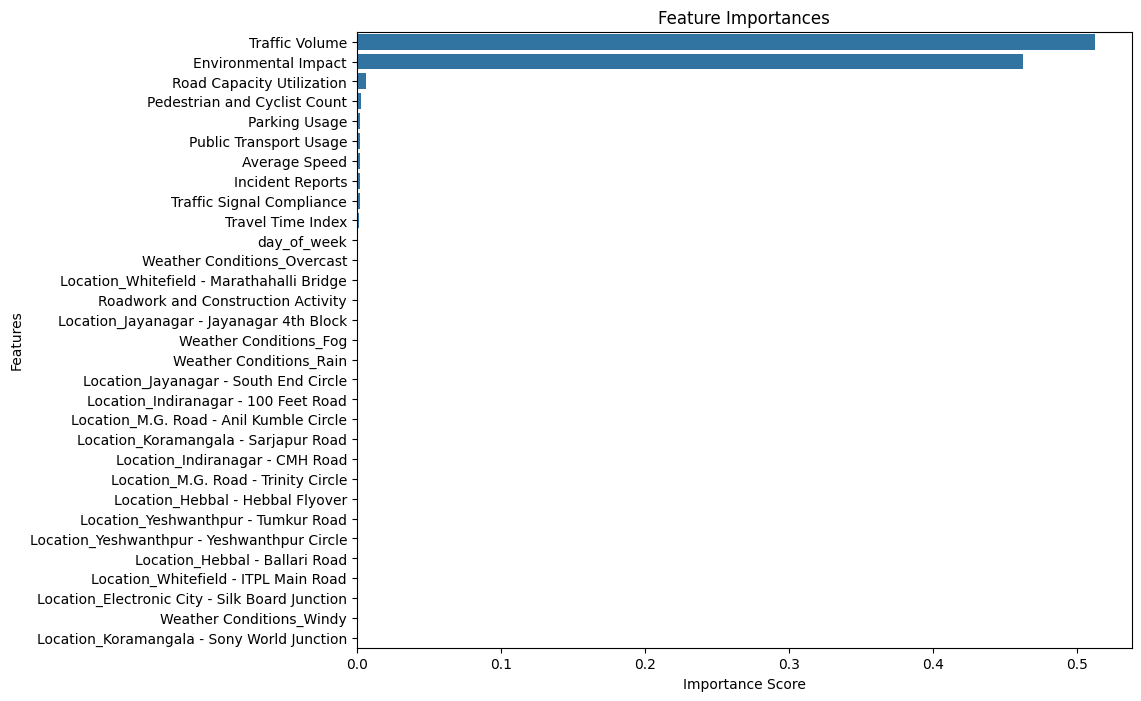

Traffic Volume                                    0.512629
Environmental Impact                              0.462727
Road Capacity Utilization                         0.006287
Pedestrian and Cyclist Count                      0.002753
Parking Usage                                     0.002542
Public Transport Usage                            0.002524
Average Speed                                     0.002443
Incident Reports                                  0.002210
Traffic Signal Compliance                         0.002206
Travel Time Index                                 0.001643
day_of_week                                       0.000936
Weather Conditions_Overcast                       0.000156
Location_Whitefield - Marathahalli Bridge         0.000102
Roadwork and Construction Activity                0.000080
Location_Jayanagar - Jayanagar 4th Block          0.000078
Weather Conditions_Fog                            0.000066
Weather Conditions_Rain                           0.0000

In [ ]:
# Get feature importances from the trained model
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Print sorted feature importances
print(feature_importances)


#Testing With Dummy Data

In [ ]:
X_train

,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,...,Location_Jayanagar - Jayanagar 4th Block,Location_Jayanagar - South End Circle,Location_Koramangala - Sarjapur Road,Location_Koramangala - Sony World Junction,Location_M.G. Road - Anil Kumble Circle,Location_M.G. Road - Trinity Circle,Location_Whitefield - ITPL Main Road,Location_Whitefield - Marathahalli Bridge,Location_Yeshwanthpur - Tumkur Road,Location_Yeshwanthpur - Yeshwanthpur Circle
468,0.340398,0.219021,1.500000,1.000000,0.1,0.340398,0.058436,0.305394,0.157331,0.129944,...,0,0,0,0,1,0,0,0,0,0
1545,0.160207,0.142873,1.375913,0.697795,0.0,0.160207,0.000000,0.899467,0.081338,0.344633,...,0,0,0,0,0,0,0,0,0,0
7773,0.539834,0.414179,1.500000,1.000000,0.2,0.539834,0.501352,0.602549,0.730991,0.203390,...,0,0,0,0,1,0,0,0,0,0
3024,0.708610,0.387274,1.500000,1.000000,0.4,0.708610,0.098094,0.852242,0.533393,0.209040,...,0,0,0,0,0,0,0,0,0,0
8586,0.443648,0.644532,1.500000,1.000000,0.2,0.443648,0.468240,0.350656,0.775771,0.333333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.251069,0.578742,1.294413,1.000000,0.0,0.251069,0.234459,0.377225,0.696925,0.192090,...,1,0,0,0,0,0,0,0,0,0
5191,0.303410,0.387084,1.161271,1.000000,0.1,0.303410,0.648068,0.994241,0.060234,0.152542,...,0,0,0,0,0,1,0,0,0,0
5390,0.527004,0.234547,1.500000,1.000000,0.1,0.527004,0.501386,0.490527,0.546119,0.000000,...,0,0,0,0,0,0,0,0,0,0
860,0.213580,0.545086,1.233040,0.914215,0.0,0.213580,0.495742,0.870454,0.775917,0.186441,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create a sample low traffic scenario
low_traffic = pd.DataFrame([{
    "Traffic Volume": 7000,
    "Average Speed": 60,
    "Travel Time Index": 1.0,
    "Road Capacity Utilization": 25,
    "Incident Reports": 0,
    "Environmental Impact": 60,
    "Public Transport Usage": 70,
    "Traffic Signal Compliance": 95,
    "Parking Usage": 30,
    "Pedestrian and Cyclist Count": 20,
    "Location_Jayanagar - Jayanagar 4th Block": 1,
    "Location_Jayanagar - South End Circle": 0,
    "Location_Koramangala - Sarjapur Road": 0,
}])

# Ensure columns match training data and fill missing with 0
low_traffic = low_traffic.reindex(columns=X_train.columns, fill_value=0)

# Scale numeric features
low_traffic[cols_to_scale] = scaler.transform(low_traffic[cols_to_scale])

# Predict traffic congestion level
print("Low Traffic Predicted Level:", model.predict(low_traffic))


Low Traffic Predicted Level: [20.47840728]


In [ ]:
# Create a sample moderate traffic scenario
moderate_traffic = pd.DataFrame([{
    "Traffic Volume": 25000,
    "Average Speed": 35,
    "Travel Time Index": 1.2,
    "Road Capacity Utilization": 75,
    "Incident Reports": 2,
    "Environmental Impact": 120,
    "Public Transport Usage": 40,
    "Traffic Signal Compliance": 85,
    "Parking Usage": 60,
    "Pedestrian and Cyclist Count": 45,
    "Location_Jayanagar - Jayanagar 4th Block": 1,
    "Location_Jayanagar - South End Circle": 0,
    "Location_Koramangala - Sarjapur Road": 0,
}])

# Align columns with training data and fill missing values with 0
moderate_traffic = moderate_traffic.reindex(columns=X_train.columns, fill_value=0)

# Scale numeric features
moderate_traffic[cols_to_scale] = scaler.transform(moderate_traffic[cols_to_scale])

# Predict traffic congestion level
print("Moderate Traffic Predicted Level:", model.predict(moderate_traffic))


Moderate Traffic Predicted Level: [89.0459928]


In [ ]:
# Create a sample high traffic scenario
high_traffic = pd.DataFrame([{
    "Traffic Volume": 60000,
    "Average Speed": 20,
    "Travel Time Index": 1.5,
    "Road Capacity Utilization": 95,
    "Incident Reports": 3,
    "Environmental Impact": 170,
    "Public Transport Usage": 30,
    "Traffic Signal Compliance": 70,
    "Parking Usage": 90,
    "Pedestrian and Cyclist Count": 80,
    "Location_Jayanagar - Jayanagar 4th Block": 0,
    "Location_Jayanagar - South End Circle": 0,
    "Location_Koramangala - Sarjapur Road": 1,
}])

# Align columns with training data and fill missing values
high_traffic = high_traffic.reindex(columns=X_train.columns, fill_value=0)

# Scale numeric features
high_traffic[cols_to_scale] = scaler.transform(high_traffic[cols_to_scale])

# Predict traffic congestion level
print("High Traffic Predicted Level:", model.predict(high_traffic))


High Traffic Predicted Level: [100.]


#Random Forest Regressor (After Target Encoding)

In [ ]:
df2.columns

Index(['Traffic Volume', 'Average Speed', 'Travel Time Index',
       'Congestion Level', 'Road Capacity Utilization', 'Incident Reports',
       'Environmental Impact', 'Public Transport Usage',
       'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Roadwork and Construction Activity',
       'Location', 'day_of_week'],
      dtype='object')

In [ ]:
X=df2.drop('Congestion Level', axis=1)
Y=df2['Congestion Level']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --- TARGET ENCODING FOR 'LOCATION' ---

# Combine X_train and y_train temporarily for aggregation
temp_train = pd.concat([X_train, y_train], axis=1)

# Calculate mean congestion for each location (using only training data)
location_congestion_map = temp_train.groupby('Location')['Congestion Level'].mean()

# Map mean congestion values to 'Location' column in training and test sets
X_train['Location_encoded'] = X_train['Location'].map(location_congestion_map)
X_test['Location_encoded'] = X_test['Location'].map(location_congestion_map)

# Fill missing values in test set with global average congestion
global_mean_congestion = y_train.mean()
X_test['Location_encoded'].fillna(global_mean_congestion, inplace=True)

# Drop original text 'Location' column
X_train.drop('Location', axis=1, inplace=True)
X_test.drop('Location', axis=1, inplace=True)

# --- MIN-MAX SCALING ---

cols_to_scale = [
    'Traffic Volume', 'Average Speed', 'Road Capacity Utilization',
    'Incident Reports', 'Environmental Impact', 'Public Transport Usage',
    'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count'
]

scaler = MinMaxScaler()

# Fit scaler on training data only and transform both train and test
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# --- RANDOM FOREST MODEL TRAINING ---

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_train_pred2 = model.predict(X_train)
y_pred2 = model.predict(X_test)

# Evaluate performance
r2_train = r2_score(y_train, y_train_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Random Forest Mean Squared Error (with Target Encoding):", mse)
print(f"Training R-squared: {r2_train}")
print("Random Forest R-squared (with Target Encoding):", r2)

# Simple overfitting check
if r2_train > r2 + 0.05:
    print("\nWarning: The model may be overfitting.")
else:
    print("\nThe model seems to have a good fit.")


/tmp/ipython-input-3343212277.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Location_encoded'].fillna(global_mean_congestion, inplace=True)


Random Forest Mean Squared Error (with Target Encoding): 18.363954856966668
Training R-squared: 0.9864295321355564
Random Forest R-squared (with Target Encoding): 0.966053520957275

The model seems to have a good fit.


In [ ]:
n=len(y_test)
p=X_test.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1))

In [ ]:
adj_r2

0.9658047587094986

#Testing on Dummy Data

In [ ]:
import pandas as pd
import numpy as np

# Create a sample scenario: busy weekday morning at a known bottleneck
dummy_data = {
    'Traffic Volume': [3500],
    'Average Speed': [15.5],
    'Travel Time Index': [2.8],
    'Road Capacity Utilization': [0.95],
    'Incident Reports': [3],
    'Environmental Impact': [85.0],
    'Public Transport Usage': [350],
    'Traffic Signal Compliance': [0.75],
    'Parking Usage': [0.90],
    'Pedestrian and Cyclist Count': [150],
    'Roadwork and Construction Activity': [1],  # 1 = Yes
    'day_of_week': [0],  # Monday
    'Location': ['Electronic City - Silk Board Junction']  # Must exist in training data
}

# Convert dictionary to DataFrame
new_data = pd.DataFrame(dummy_data)

# Apply Target Encoding for 'Location'
new_data['Location_encoded'] = new_data['Location'].map(location_congestion_map)
new_data.drop('Location', axis=1, inplace=True)

# Scale numeric features
cols_to_scale = [
    'Traffic Volume', 'Average Speed', 'Road Capacity Utilization',
    'Incident Reports', 'Environmental Impact', 'Public Transport Usage',
    'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count'
]
new_data[cols_to_scale] = scaler.transform(new_data[cols_to_scale])

# Ensure column order matches training data
new_data = new_data[X_train.columns]

# Predict congestion level
predicted_congestion = model.predict(new_data)
print(f"\n\n--> Predicted Congestion Level: {predicted_congestion[0]:.2f}")




--> Predicted Congestion Level: 42.47


In [ ]:
# Create a sample scenario: quiet weekend night with free-flowing traffic
dummy_data_quiet = {
    'Traffic Volume': [300],
    'Average Speed': [60.2],
    'Travel Time Index': [0.8],
    'Road Capacity Utilization': [0.15],
    'Incident Reports': [0],
    'Environmental Impact': [12.0],
    'Public Transport Usage': [20],
    'Traffic Signal Compliance': [0.98],
    'Parking Usage': [0.10],
    'Pedestrian and Cyclist Count': [15],
    'Roadwork and Construction Activity': [0],  # 0 = No
    'day_of_week': [6],  # Sunday
    'Location': ['Jayanagar - Jayanagar 4th Block']  # Must exist in training data
}

# Convert dictionary to DataFrame
new_data_quiet = pd.DataFrame(dummy_data_quiet)

# Apply Target Encoding for 'Location'
new_data_quiet['Location_encoded'] = new_data_quiet['Location'].map(location_congestion_map)
new_data_quiet.drop('Location', axis=1, inplace=True)

# Scale numeric features
new_data_quiet[cols_to_scale] = scaler.transform(new_data_quiet[cols_to_scale])

# Align columns with training data
new_data_quiet = new_data_quiet[X_train.columns]

# Predict congestion level
predicted_congestion_quiet = model.predict(new_data_quiet)
print(f"\n\n--> Predicted Congestion Level (Quiet Scenario): {predicted_congestion_quiet[0]:.2f}")




--> Predicted Congestion Level (Quiet Scenario): 15.66


In [ ]:
# Create a worst-case scenario: major incident during peak rush hour
dummy_data_extreme = {
    'Traffic Volume': [5000],                 # Very high traffic
    'Average Speed': [5.0],                    # Very low speed
    'Travel Time Index': [4.5],                # High travel time
    'Road Capacity Utilization': [1.0],        # Road at 100% capacity
    'Incident Reports': [10],                  # Multiple incidents
    'Environmental Impact': [98.0],            # High pollution
    'Public Transport Usage': [500],           # High usage
    'Traffic Signal Compliance': [0.50],       # Low compliance
    'Parking Usage': [0.98],                   # Full parking
    'Pedestrian and Cyclist Count': [400],     # High pedestrian/cyclist count
    'Roadwork and Construction Activity': [1], # Active roadwork
    'day_of_week': [4],                        # Friday
    'Location': ['Koramangala - Sarjapur Road'] # Busy major road
}

# Convert dictionary to DataFrame
new_data_extreme = pd.DataFrame(dummy_data_extreme)

# Apply Target Encoding for 'Location'
new_data_extreme['Location_encoded'] = new_data_extreme['Location'].map(location_congestion_map)
new_data_extreme.drop('Location', axis=1, inplace=True)

# Scale numeric features
new_data_extreme[cols_to_scale] = scaler.transform(new_data_extreme[cols_to_scale])

# Align columns with training data
new_data_extreme = new_data_extreme[X_train.columns]

# Predict congestion level
predicted_congestion_extreme = model.predict(new_data_extreme)
print(f"\n\n--> Predicted Congestion Level (Extreme Scenario): {predicted_congestion_extreme[0]:.2f}")




--> Predicted Congestion Level (Extreme Scenario): 60.06
